<a href="https://colab.research.google.com/github/shadynagy111-eng/s4/blob/main/X_LSTM_Chest_Sinogram_classification_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xlstm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━

In [ ]:
import xlstm

In [ ]:
import torch

from xlstm import (
    xLSTMBlockStack,
    xLSTMBlockStackConfig,
    mLSTMBlockConfig,
    mLSTMLayerConfig,
    sLSTMBlockConfig,
    sLSTMLayerConfig,
    FeedForwardConfig,
)

cfg = xLSTMBlockStackConfig(
    mlstm_block=mLSTMBlockConfig(
        mlstm=mLSTMLayerConfig(
            conv1d_kernel_size=4, qkv_proj_blocksize=4, num_heads=4
        )
    ),
    slstm_block=sLSTMBlockConfig(
        slstm=sLSTMLayerConfig(
            backend="cuda",
            num_heads=4,
            conv1d_kernel_size=4,
            bias_init="powerlaw_blockdependent",
        ),
        feedforward=FeedForwardConfig(proj_factor=1.3, act_fn="gelu"),
    ),
    context_length=256,
    num_blocks=4,
    embedding_dim=128,
    slstm_at=[1],

)

xlstm_stack = xLSTMBlockStack(cfg)

x = torch.randn(4, 256, 128).to("cuda")
xlstm_stack = xlstm_stack.to("cuda")
y = xlstm_stack(x)
y.shape == x.shape

{'verbose': True, 'with_cuda': True, 'extra_ldflags': ['-L/usr/local/cuda/lib', '-lcublas'], 'extra_cflags': ['-DSLSTM_HIDDEN_SIZE=128', '-DSLSTM_BATCH_SIZE=8', '-DSLSTM_NUM_HEADS=4', '-DSLSTM_NUM_STATES=4', '-DSLSTM_DTYPE_B=float', '-DSLSTM_DTYPE_R=__nv_bfloat16', '-DSLSTM_DTYPE_W=__nv_bfloat16', '-DSLSTM_DTYPE_G=__nv_bfloat16', '-DSLSTM_DTYPE_S=__nv_bfloat16', '-DSLSTM_DTYPE_A=float', '-DSLSTM_NUM_GATES=4', '-DSLSTM_SIMPLE_AGG=true', '-DSLSTM_GRADIENT_RECURRENT_CLIPVAL_VALID=false', '-DSLSTM_GRADIENT_RECURRENT_CLIPVAL=0.0', '-DSLSTM_FORWARD_CLIPVAL_VALID=false', '-DSLSTM_FORWARD_CLIPVAL=0.0', '-U__CUDA_NO_HALF_OPERATORS__', '-U__CUDA_NO_HALF_CONVERSIONS__', '-U__CUDA_NO_BFLOAT16_OPERATORS__', '-U__CUDA_NO_BFLOAT16_CONVERSIONS__', '-U__CUDA_NO_BFLOAT162_OPERATORS__', '-U__CUDA_NO_BFLOAT162_CONVERSIONS__'], 'extra_cuda_cflags': ['-Xptxas="-v"', '-gencode', 'arch=compute_80,code=compute_80', '-res-usage', '--use_fast_math', '-O3', '-Xptxas -O3', '--extra-device-vectorization', '-DSLSTM_

Using /root/.cache/torch_extensions/py311_cu124 as PyTorch extensions root...
Creating extension directory /root/.cache/torch_extensions/py311_cu124/slstm_HS128BS8NH4NS4DBfDRbDWbDGbDSbDAfNG4SA1GRCV0GRC0d0FCV0FC0d0...
Detected CUDA files, patching ldflags
Emitting ninja build file /root/.cache/torch_extensions/py311_cu124/slstm_HS128BS8NH4NS4DBfDRbDWbDGbDSbDAfNG4SA1GRCV0GRC0d0FCV0FC0d0/build.ninja...
/usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:1964: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Building extension module slstm_HS128BS8NH4NS4DBfDRbDWbDGbDSbDAfNG4SA1GRCV0GRC0d0FCV0FC0d0...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)
Loading extension module slstm_HS128BS8NH4NS4DBfDRbDWbDGbDSbDAfNG4SA1GRCV0GRC0d0FCV0FC0d0...
/usr/local/lib/python3.11/di

True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image
from skimage.transform import resize,radon
from skimage.io import imread
import os
import numpy as np
import torch
def jpg_to_sinogram(jpg_path):
    """
    Loads a JPG image, converts it to a sinogram, and returns the sinogram as a NumPy array.
    """
    # Load the JPG image using Pillow library
    image = Image.open(jpg_path).convert('L')  # Convert to grayscale
    image = np.array(image)

    # Resize the image to 64x64
    image = resize(image, (128, 128))

    # Calculate the sinogram using radon transform
    theta = np.linspace(0., 180., max(image.shape), endpoint=False)
    sinogram = radon(image, theta=theta, circle=True)

    return sinogram

In [ ]:
# Define paths to the three folders containing JPG images
folder_paths = ["/content/drive/MyDrive/PHD/Simulation/CHEST_CT_Data/train/normal",
                "/content/drive/MyDrive/PHD/Simulation/CHEST_CT_Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib",
                "/content/drive/MyDrive/PHD/Simulation/CHEST_CT_Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa",
                "/content/drive/MyDrive/PHD/Simulation/CHEST_CT_Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa"]

# Create an empty list to store sinograms
sinograms = []

labels = []

# Define class labels
class_labels = {
    "normal": 0,
    "adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib": 1,
    "large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa": 2,
    'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa':3,
}

# Iterate over the folders and their contents
for folder_path in folder_paths:
    for filename in os.listdir(folder_path):
        if filename.endswith(".png"):  # Change to .jpg
            jpg_path = os.path.join(folder_path, filename)
            sinogram = jpg_to_sinogram(jpg_path)
            sinograms.append(sinogram)
            # Extract class label from folder name
            label = class_labels[os.path.basename(folder_path)]
            labels.append(label)

# Convert the list of sinograms to a PyTorch tensor
sinogram_tensor = torch.tensor(np.stack(sinograms))
labels_tensor = torch.tensor(labels)

# Print the shape of the resulting tensor
print("Sinogram tensor shape:", sinogram_tensor.shape)

/usr/local/lib/python3.11/dist-packages/skimage/transform/radon_transform.py:74: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn(


Sinogram tensor shape: torch.Size([888, 128, 128])


In [ ]:
# Generate random dataset
from torch.utils.data import TensorDataset, DataLoader,random_split


# Generate random dataset
sinogram_tensor = sinogram_tensor.type(torch.float32)
num_samples = sinogram_tensor.shape[0]*sinogram_tensor.shape[1]   # 259
sequence_length = sinogram_tensor.shape[2]

input_size = 1
num_classes = 4


'''
X = torch.randn(num_samples, sequence_length, input_size)
y = torch.randint(0, num_classes, (num_samples,))
'''
# Create dataset and dataloader
X= sinogram_tensor.reshape(num_samples, sequence_length, input_size)
print(X.shape)
y = labels_tensor
y=y.repeat_interleave(sequence_length)
print(y.shape)

dataset = TensorDataset(X, y)

# Split the dataset into training and validation sets
train_size = int(0.7* len(dataset))
val_size = int(0.5*(len(dataset) - train_size))
test_size=int(len(dataset) - train_size - val_size)
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size,test_size])

# Create data loaders for training and validation sets

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)
test_loader= DataLoader(test_dataset, batch_size=8, shuffle=False)

torch.Size([113664, 128, 1])
torch.Size([113664])


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from xlstm import xLSTMBlockStack, xLSTMBlockStackConfig

# Define the model architecture
class SinogramClassifier(nn.Module):
    def __init__(self, xlstm_config, num_classes):
        super(SinogramClassifier, self).__init__()
        self.xlstm = xLSTMBlockStack(xlstm_config)
        self.fc = nn.Linear(xlstm_config.embedding_dim, num_classes)  # Adjust output dimension

    def forward(self, x):
        # Reshape input to match xLSTM expected dimensions
        x = x.permute(0, 2, 1)  # (batch_size, sequence_length, embedding_dim)
        x = self.xlstm(x)
        x = x[:, -1, :]  # Take the output from the last timestep
        x = self.fc(x)
        return x

# Define xLSTM configuration (you can adjust these parameters)
xlstm_config = xLSTMBlockStackConfig(
    mlstm_block=mLSTMBlockConfig(
        mlstm=mLSTMLayerConfig(
            conv1d_kernel_size=4, qkv_proj_blocksize=4, num_heads=4
        )
    ),
    slstm_block=sLSTMBlockConfig(
        slstm=sLSTMLayerConfig(
            backend="cuda",
            num_heads=1,
            conv1d_kernel_size=4,
            bias_init="powerlaw_blockdependent",
        ),
        feedforward=FeedForwardConfig(proj_factor=1.3, act_fn="gelu"),
    ),
    context_length=128,
    num_blocks=7,
    embedding_dim=128,
    slstm_at=[1],
)


# Instantiate the model
num_classes = 4 # Assuming 'unique_labels' is defined
model = SinogramClassifier(xlstm_config, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)  # Adjust learning rate

# Move model and data to the appropriate device (e.g., CUDA)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)



{'verbose': True, 'with_cuda': True, 'extra_ldflags': ['-L/usr/local/cuda/lib', '-lcublas'], 'extra_cflags': ['-DSLSTM_HIDDEN_SIZE=128', '-DSLSTM_BATCH_SIZE=8', '-DSLSTM_NUM_HEADS=1', '-DSLSTM_NUM_STATES=4', '-DSLSTM_DTYPE_B=float', '-DSLSTM_DTYPE_R=__nv_bfloat16', '-DSLSTM_DTYPE_W=__nv_bfloat16', '-DSLSTM_DTYPE_G=__nv_bfloat16', '-DSLSTM_DTYPE_S=__nv_bfloat16', '-DSLSTM_DTYPE_A=float', '-DSLSTM_NUM_GATES=4', '-DSLSTM_SIMPLE_AGG=true', '-DSLSTM_GRADIENT_RECURRENT_CLIPVAL_VALID=false', '-DSLSTM_GRADIENT_RECURRENT_CLIPVAL=0.0', '-DSLSTM_FORWARD_CLIPVAL_VALID=false', '-DSLSTM_FORWARD_CLIPVAL=0.0', '-U__CUDA_NO_HALF_OPERATORS__', '-U__CUDA_NO_HALF_CONVERSIONS__', '-U__CUDA_NO_BFLOAT16_OPERATORS__', '-U__CUDA_NO_BFLOAT16_CONVERSIONS__', '-U__CUDA_NO_BFLOAT162_OPERATORS__', '-U__CUDA_NO_BFLOAT162_CONVERSIONS__'], 'extra_cuda_cflags': ['-Xptxas="-v"', '-gencode', 'arch=compute_80,code=compute_80', '-res-usage', '--use_fast_math', '-O3', '-Xptxas -O3', '--extra-device-vectorization', '-DSLSTM_

Using /root/.cache/torch_extensions/py311_cu124 as PyTorch extensions root...
Creating extension directory /root/.cache/torch_extensions/py311_cu124/slstm_HS128BS8NH1NS4DBfDRbDWbDGbDSbDAfNG4SA1GRCV0GRC0d0FCV0FC0d0...
Detected CUDA files, patching ldflags
Emitting ninja build file /root/.cache/torch_extensions/py311_cu124/slstm_HS128BS8NH1NS4DBfDRbDWbDGbDSbDAfNG4SA1GRCV0GRC0d0FCV0FC0d0/build.ninja...
/usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:1964: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Building extension module slstm_HS128BS8NH1NS4DBfDRbDWbDGbDSbDAfNG4SA1GRCV0GRC0d0FCV0FC0d0...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)
Loading extension module slstm_HS128BS8NH1NS4DBfDRbDWbDGbDSbDAfNG4SA1GRCV0GRC0d0FCV0FC0d0...
/usr/local/lib/python3.11/di

SinogramClassifier(
  (xlstm): xLSTMBlockStack(
    (blocks): ModuleList(
      (0): mLSTMBlock(
        (xlstm_norm): LayerNorm()
        (xlstm): mLSTMLayer(
          (proj_up): Linear(in_features=128, out_features=512, bias=False)
          (q_proj): LinearHeadwiseExpand(in_features=256, num_heads=64, expand_factor_up=1, bias=False, trainable_weight=True, trainable_bias=True, )
          (k_proj): LinearHeadwiseExpand(in_features=256, num_heads=64, expand_factor_up=1, bias=False, trainable_weight=True, trainable_bias=True, )
          (v_proj): LinearHeadwiseExpand(in_features=256, num_heads=64, expand_factor_up=1, bias=False, trainable_weight=True, trainable_bias=True, )
          (conv1d): CausalConv1d(
            (conv): Conv1d(256, 256, kernel_size=(4,), stride=(1,), padding=(3,), groups=256)
          )
          (conv_act_fn): SiLU()
          (mlstm_cell): mLSTMCell(
            (igate): Linear(in_features=768, out_features=4, bias=True)
            (fgate): Linear(in_featu

In [ ]:
# Training and validation loop
num_epochs = 20

for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss = 0.0
    total_train = 0
    correct_train = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
         # Calculate training accuracy for this batch
        _, predicted = torch.max(output.data, 1)
        total_train += target.size(0)
        correct_train += (predicted == target).sum().item()

    train_loss /= len(train_loader)
    train_accuracy = 100 * correct_train / total_train

    # Validation
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in val_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            val_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    val_loss /= len(val_loader)
    accuracy = 100 * correct / total

    # Print epoch results
    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f} "
          f"Val Loss: {val_loss:.4f} "
          f"Train Accuracy: {train_accuracy:.2f}% "
          f"Val_Accuracy: {accuracy:.2f}%")

Epoch [1/20] Train Loss: 1.2972 Val Loss: 1.2365 Train Accuracy: 35.11% Val_Accuracy: 40.52%
Epoch [2/20] Train Loss: 1.1925 Val Loss: 1.1543 Train Accuracy: 43.73% Val_Accuracy: 46.40%
Epoch [3/20] Train Loss: 1.1071 Val Loss: 1.0777 Train Accuracy: 49.88% Val_Accuracy: 51.78%
Epoch [4/20] Train Loss: 1.0407 Val Loss: 1.0289 Train Accuracy: 53.83% Val_Accuracy: 54.23%
Epoch [5/20] Train Loss: 0.9969 Val Loss: 0.9931 Train Accuracy: 55.98% Val_Accuracy: 55.63%
Epoch [6/20] Train Loss: 0.9625 Val Loss: 0.9654 Train Accuracy: 57.58% Val_Accuracy: 56.94%
Epoch [7/20] Train Loss: 0.9339 Val Loss: 0.9431 Train Accuracy: 59.06% Val_Accuracy: 58.21%
Epoch [8/20] Train Loss: 0.9075 Val Loss: 0.9201 Train Accuracy: 60.26% Val_Accuracy: 59.21%
Epoch [9/20] Train Loss: 0.8833 Val Loss: 0.9002 Train Accuracy: 61.60% Val_Accuracy: 60.55%


KeyboardInterrupt: 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

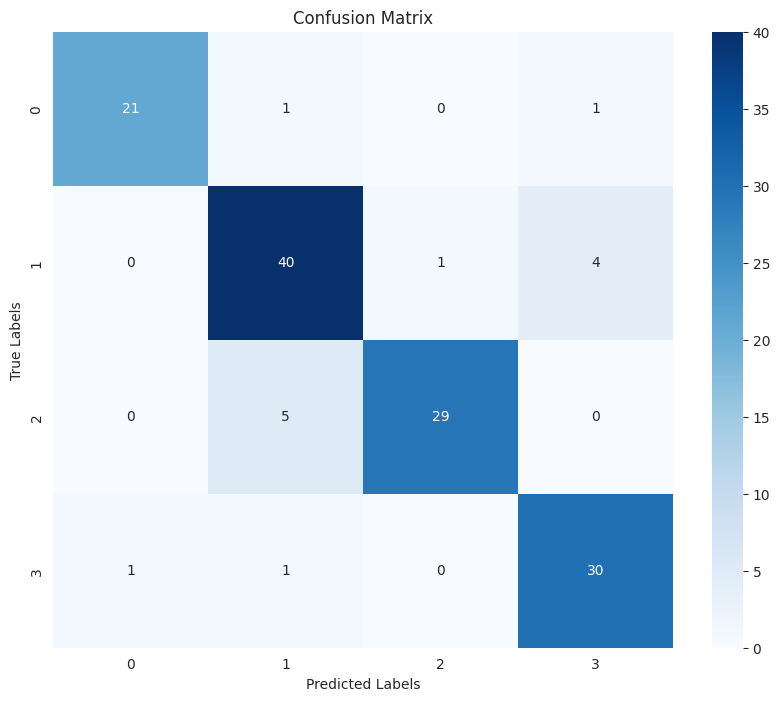

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Testing the model
model.eval()  # Set the model to evaluation mode
y_true = []
y_pred = []

with torch.no_grad():  # Disable gradient calculation during inference
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        y_true.extend(target.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
# Print the classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        23
           1       0.85      0.89      0.87        45
           2       0.97      0.85      0.91        34
           3       0.86      0.94      0.90        32

    accuracy                           0.90       134
   macro avg       0.91      0.90      0.90       134
weighted avg       0.90      0.90      0.90       134



In [ ]:
import re

report_str = """

  precision    recall  f1-score   support

           0       0.95      0.91      0.93        23
           1       0.85      0.89      0.87        45
           2       0.97      0.85      0.91        34
           3       0.86      0.94      0.90        32

    accuracy                           0.90       134
   macro avg       0.91      0.90      0.90       134
weighted avg       0.90      0.90      0.90       134

"""

# Define a pattern to capture metrics and class names
pattern = r"(\w+)\s+([0-9.]+)\s+([0-9.]+)\s+([0-9.]+)\s+([0-9]+)"

# Extract data using the pattern
data = []
for line in report_str.split("\n"):
    match = re.search(pattern, line)
    if match:
        class_name = match.group(1)
        precision = float(match.group(2))
        recall = float(match.group(3))
        f1_score = float(match.group(4))
        support = int(match.group(5))
        data.append([class_name, precision, recall, f1_score, support])

# Convert data to a dictionary
report_dict = {}
for row in data:
    class_name = row[0]
    report_dict[class_name] = {
        "precision": row[1],
        "recall": row[2],
        "f1-score": row[3],
        "support": row[4],
    }

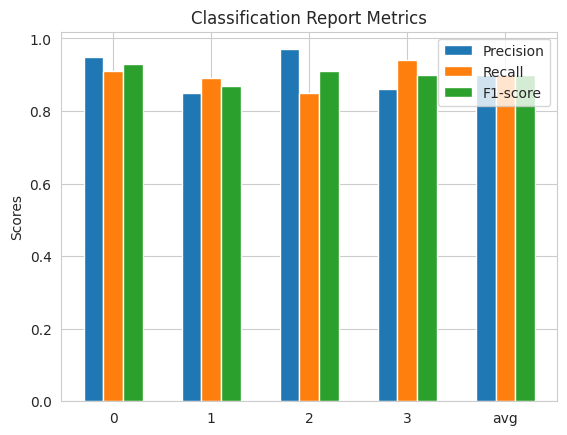

In [ ]:
# Extract metrics for plotting
categories = list(report_dict.keys())
precision = [report_dict[c]['precision'] for c in categories]
recall = [report_dict[c]['recall'] for c in categories]
f1_score = [report_dict[c]['f1-score'] for c in categories]

# Create bar positions
x = np.arange(len(categories))
width = 0.2  # Width of each bar

# Create the bar plot
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-score')

# Add labels, title, and legend
ax.set_ylabel('Scores')
ax.set_title('Classification Report Metrics')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Display the plot
plt.show()